# アヤメのデータ

In [86]:
import seaborn as sns
import numpy as np
iris = sns.load_dataset('iris')
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## プロットのおまじない

In [18]:
import matplotlib.pyplot as plt

## とりあえず散布図全部見る

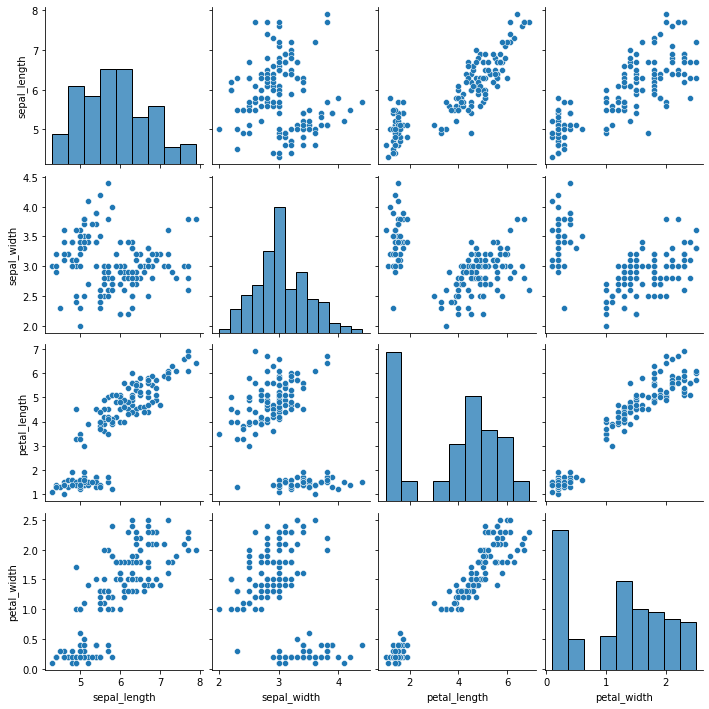

In [14]:
sns.pairplot(iris)

## 散布図

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


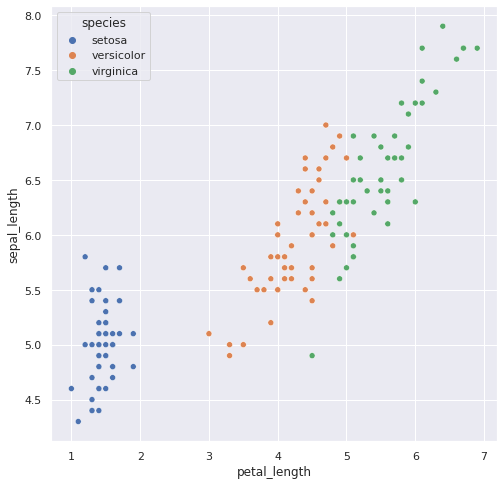

In [34]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
sns.scatterplot('petal_length','sepal_length',data=iris,hue='species',ax=ax)
plt.show()

## 相関係数

In [46]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## ヒストグラムとカーネル密度推定

<AxesSubplot:ylabel='Density'>

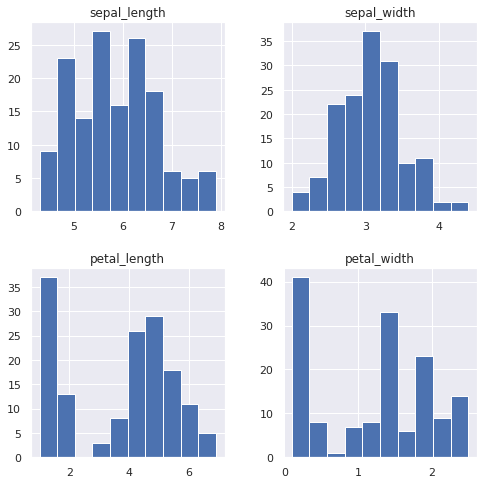

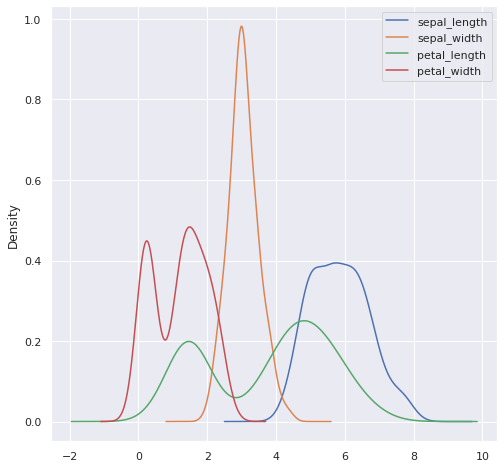

In [90]:
iris.hist(figsize=(8,8))
iris.plot.kde(figsize=(8,8))

## 単回帰

[[0.40892228]]
[4.30660342]
0.759954645772515


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


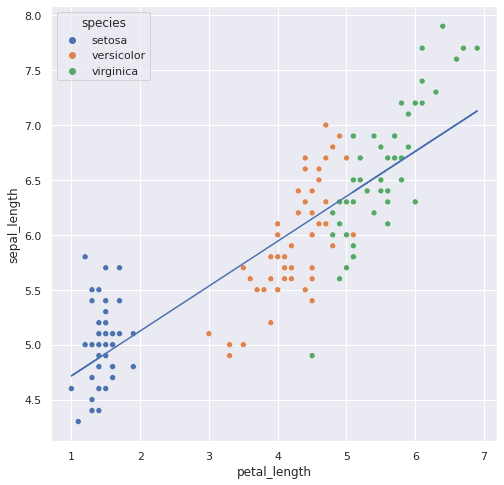

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,petal_length,petal_width,kmeans
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [80]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
### 説明変数にpetal_lengthを利用
X = iris["petal_length"].values.reshape(-1,1)
 
### 目的変数にsepal_lengthを利用
Y = iris["sepal_length"].values.reshape(-1,1)
 
### 予測モデルを作成
clf.fit(X, Y)
 
### 回帰係数
print(clf.coef_)
 
### 切片
print(clf.intercept_)
 
### 決定係数
print(clf.score(X, Y))

### プロット
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(X, clf.predict(X))
sns.scatterplot('petal_length','sepal_length',data=iris,hue='species',ax=ax)
plt.show()
display(iris)
display(iris_kmeans)

## 重回帰

In [70]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
### 説明変数にpetal_lengthを利用
X = iris[["petal_length","petal_width"]].values
 
### 目的変数にsepal_lengthを利用
Y = iris["sepal_length"].values.reshape(-1,1)
 
### 予測モデルを作成
clf.fit(X, Y)
 
### 切片
print(clf.intercept_)
 
### 決定係数
print(clf.score(X, Y))

# 偏回帰係数
pd.DataFrame({"Name":["petal_length","petal_width"],"Coefficients":clf.coef_[0]})

[[ 0.54177715 -0.31955056]]
[4.19058243]
0.7662612975425306


,Name,Coefficients
0,petal_length,0.541777
1,petal_width,-0.319551


## クラスタリング

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


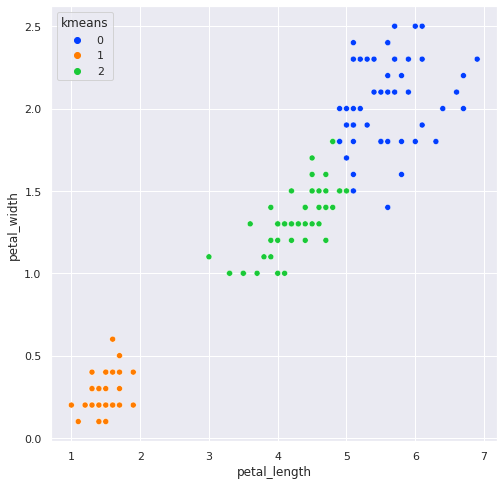

In [85]:
from sklearn.cluster import KMeans
data = iris[["petal_length","petal_width"]].values

pred = KMeans(n_clusters=3).fit_predict(data)
iris_kmeans = pd.DataFrame(data,columns=["petal_length","petal_width"])
iris_kmeans["kmeans"] = pred

### プロット
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
sns.scatterplot('petal_length','petal_width',data=iris_kmeans,hue='kmeans',ax=ax, palette='bright')
plt.show()

## 主成分分析

In [98]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X = pca.fit_transform(iris[["sepal_length","sepal_width","petal_length","petal_width"]].values)
embed3 = pd.DataFrame(X)               
embed3.head()                  

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


# csvデータの読み込み

[足立区のサイト](https://www.city.adachi.tokyo.jp/juyo/covid19list.html)から2021年のデータのcsvをダウンロードしてきた。
![データ](../img/pic1.png)

In [11]:
import pandas as pd

### csvデータの読み込み
df = pd.read_csv("../data/131200_city_adachi_covid19_patients_2021.csv")

### データの表示
display(df)

,No.,市区町村コード,都道府県,市区町村名,診断日,居住地,年代,性別,渡航歴,症状
0,3113,131200,東京都,足立区,2021/1/1,区内,90代,男性,-,咳、頭痛、咽頭痛
1,3114,131200,東京都,足立区,2021/1/1,区内,80代,男性,-,発熱
2,3115,131200,東京都,足立区,2021/1/1,区内,60代,女性,-,無症状
3,3116,131200,東京都,足立区,2021/1/1,区内,50代,女性,-,無症状
4,3117,131200,東京都,足立区,2021/1/1,区内,50代,女性,-,咳、頭痛
...,...,...,...,...,...,...,...,...,...,...
14936,18067,131200,東京都,足立区,2021/12/31,区内,90代,女性,-,無症状
14937,18068,131200,東京都,足立区,2021/12/31,区内,30代,女性,-,発熱、
14938,18069,131200,東京都,足立区,2021/12/31,区内,40代,男性,-,発熱、咳以外の急性呼吸器症状、下痢
14939,18074,131200,東京都,足立区,2021/12/31,区内,70代,女性,-,発熱


# データのプロット